In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [7]:
Image_Width = 150
Image_Height = 150
Cannels = 3

INPUT_SHAPE = (Image_Width, Image_Height, Cannels)
NB_CLASSES = 2
EPOCHS = 15
BATCH_SIZE = 32

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

2021-12-27 09:07:53.647509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 09:07:53.648616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 09:07:53.649265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-27 09:07:53.650094: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 250)       144250    
_________________________________________________________________
activation_2 (Activation)    (None, 70, 70, 250)       0

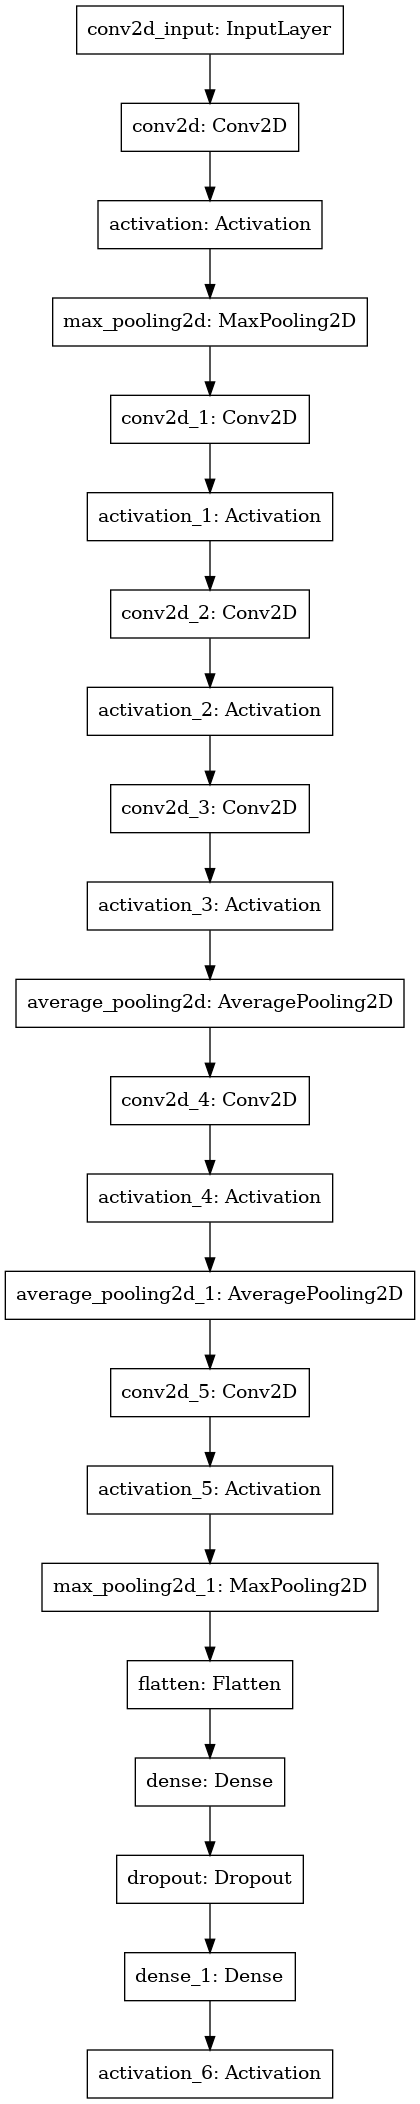

In [10]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '../input/basic-part/basic_data/train',
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    '../input/basic-part/basic_data/val', 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 10000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.

2021-12-27 09:07:59.273988: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2021-12-27 09:08:01.133363: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


312/312 [==============================] - 97s 287ms/step - loss: 0.5953 - accuracy: 0.7320 - val_loss: 0.7846 - val_accuracy: 0.6663
Epoch 2/15
312/312 [==============================] - 77s 246ms/step - loss: 0.4564 - accuracy: 0.7850 - val_loss: 0.8328 - val_accuracy: 0.6149
Epoch 3/15
312/312 [==============================] - 76s 245ms/step - loss: 0.4248 - accuracy: 0.8087 - val_loss: 0.7195 - val_accuracy: 0.6069
Epoch 4/15
312/312 [==============================] - 76s 244ms/step - loss: 0.4155 - accuracy: 0.8129 - val_loss: 0.9243 - val_accuracy: 0.6240
Epoch 5/15
312/312 [==============================] - 77s 248ms/step - loss: 0.4012 - accuracy: 0.8217 - val_loss: 0.7539 - val_accuracy: 0.6018
Epoch 6/15
312/312 [==============================] - 77s 245ms/step - loss: 0.3913 - accuracy: 0.8272 - val_loss: 0.9612 - val_accuracy: 0.6331
Epoch 7/15
312/312 [==============================] - 77s 247ms/step - loss: 0.3854 - accuracy: 0.8298 - val_loss: 0.8993 - val_accuracy: 0.6

In [13]:
#prediction

In [14]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.8501203656196594
validation_accuracy 0.6078628897666931


In [15]:
#Label and prediction

In [16]:
from tqdm import tqdm_notebook
from keras.preprocessing import image

all_preds = []
for i in tqdm_notebook(range(1500)):
    test_image = image.load_img('../input/basic-part/basic_data/private/test_{i}.jpg'.format(i = i), target_size = (Image_Height, Image_Width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)
    if result >= 0.5:
        result = 1
    else:
        result = 0
    all_preds.append(result)
print(all_preds)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/1500 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [17]:
prediction = {'Edema' : all_preds}
prediction_df = pd.DataFrame(prediction)
prediction_df.to_csv('[106091228]_basic_prediction.csv')